In [1]:
from Exercise import Exercise, MarkdownBlock
from config import URL, TOKEN
import json

import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams.update({'font.size': 20})

from sklearn.datasets import load_digits

Exercise.URL = URL
Exercise.TOKEN = TOKEN

### Integer addition

In [4]:
e = Exercise("What is $1 + 1$?")
e.add_answer(2, True, "That's right!")
e.add_answer(0, False, "No, that's not right. Did you compute $1-1=0$ instead?")
e.add_default_feedback("No, that's not right!")
e.evaluate_answer(1)
e.display()
e.write()
e.publish()

# Show symbolic equivalence!


Published succesfully, preview at: https://www.mscthesis.nl/preview?id=9f4e34c3-bfa7-4393-9931-da4679b91a79


### Parameterized integer addition

In [5]:
m = "What is $@a + @b$?"

a = np.random.randint(0, 10)
b = np.random.randint(0, 10)

params = {}
params["a"] = a  
params["b"] = b

e = Exercise(MarkdownBlock(m, params))

e.add_answer(a + b, True, "That's right!")
e.display()
e.write()
e.publish()


Published succesfully, preview at: https://www.mscthesis.nl/preview?id=8005d66e-b22b-40dc-ac79-e25f7428938b


### Vector addition

In [8]:
m = "What is $@a + @b$?"

a = sp.Matrix(np.arange(4))
b = sp.Matrix(np.flip(np.arange(4)))

params = {}
params["a"] = a 
params["b"] = b

e = Exercise(MarkdownBlock(m, params))

e.add_answer(a + b, True, "That's right!")
e.display()
e.write()
e.publish()

Published succesfully, preview at: https://www.mscthesis.nl/preview?id=9a48b304-67d5-462e-9eea-87e18b8ca6e6


### Parameterized (both matrix dimensions and values) 

In [9]:
s = "What is $@a \cdot @b$"

rows = np.random.randint(1, 6)
columns = np.random.randint(1, 6)

params = {}
params["a"] = sp.Matrix(np.random.randint(5, size=rows*columns).reshape((rows,columns)))
params["b"] = sp.Matrix(np.random.randint(5, size=(2+rows)*columns).reshape((columns,rows+2)))

e = Exercise(MarkdownBlock(s, params))

ans = params["a"] * params["b"]
display(ans)
e.add_answer(params["a"] * params["b"], True, "That's right!")
e.add_default_feedback("Nope, that's not right!")
e.display()
e.write()
e.publish()

Matrix([[6, 21, 17]])

Published succesfully, preview at: https://www.mscthesis.nl/preview?id=60e9db4b-c589-4650-ba8d-ed713826441b


### Matrix visualization, contextualized exercise (MNIST dataset, hand-written digit recognition problem)

In [13]:
# Helper functions

digits = load_digits()
sorted_indices = np.argsort(digits.target)
nums = digits.images[sorted_indices]

# Plot and save matrix image
def save_image_for(matrix, filename):
    fig, ax = plt.subplots()
    
    ax.xaxis.set_label_position('top')
    ax.set_xticklabels([i for i in range(0, 9)])

    ax.yaxis.set_label_position('left') 
    ax.set_yticklabels([i for i in range(0, 9)])

    # Minor ticks
    ax.set_xticks(np.arange(-.5, 10, 1), minor=True)
    ax.set_yticks(np.arange(-.5, 10, 1), minor=True)

    ax.grid(which='minor', color='black', linestyle='-', linewidth=2)
    ax.matshow(matrix, cmap='binary')
    
    plt.savefig(filename, dpi=300, bbox_inches='tight')

# Return binary representation of image matrix
def to_binary(m):
    return np.where(m > 7, 1, 0)

<ipython-input-13-de1d524c2286>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([i for i in range(0, 9)])
<ipython-input-13-de1d524c2286>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([i for i in range(0, 9)])



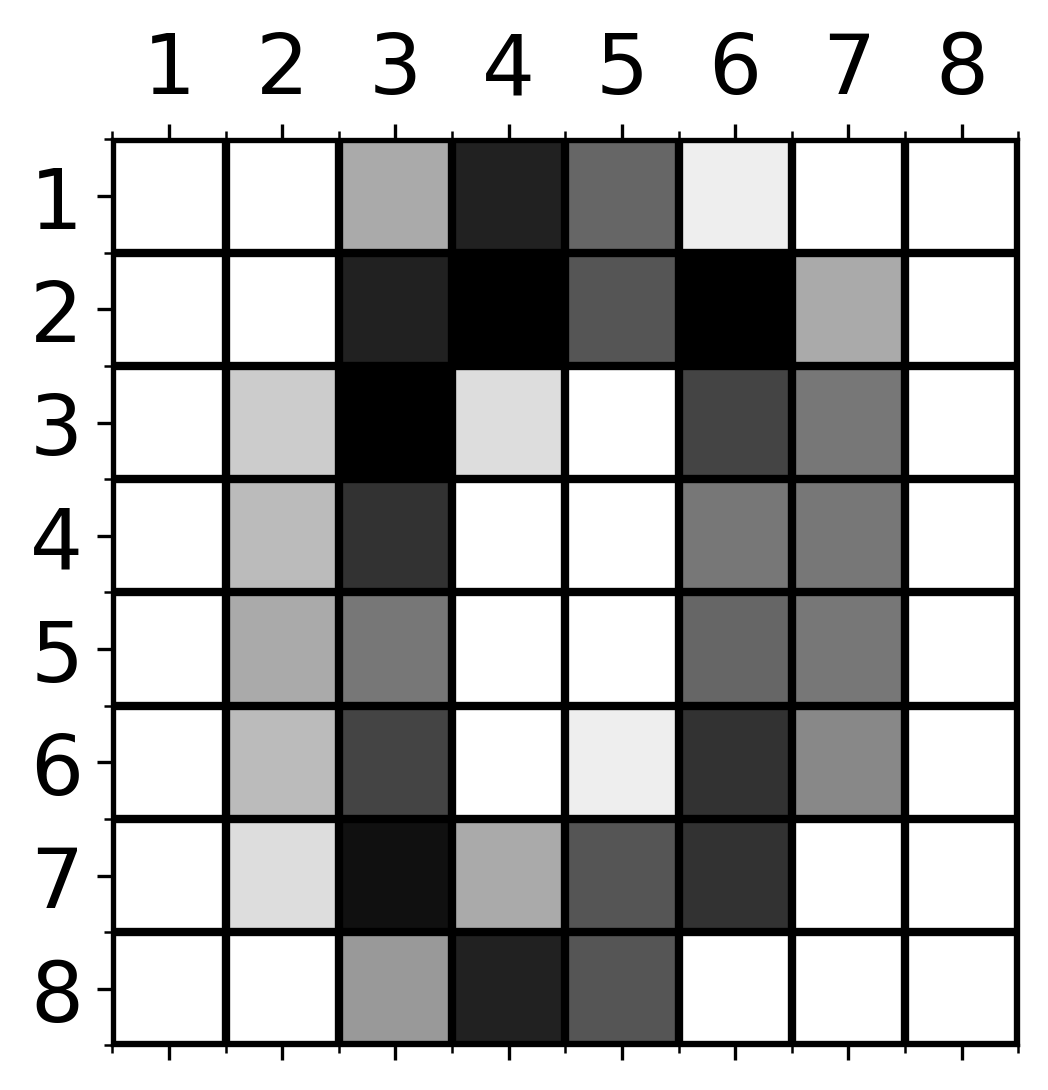
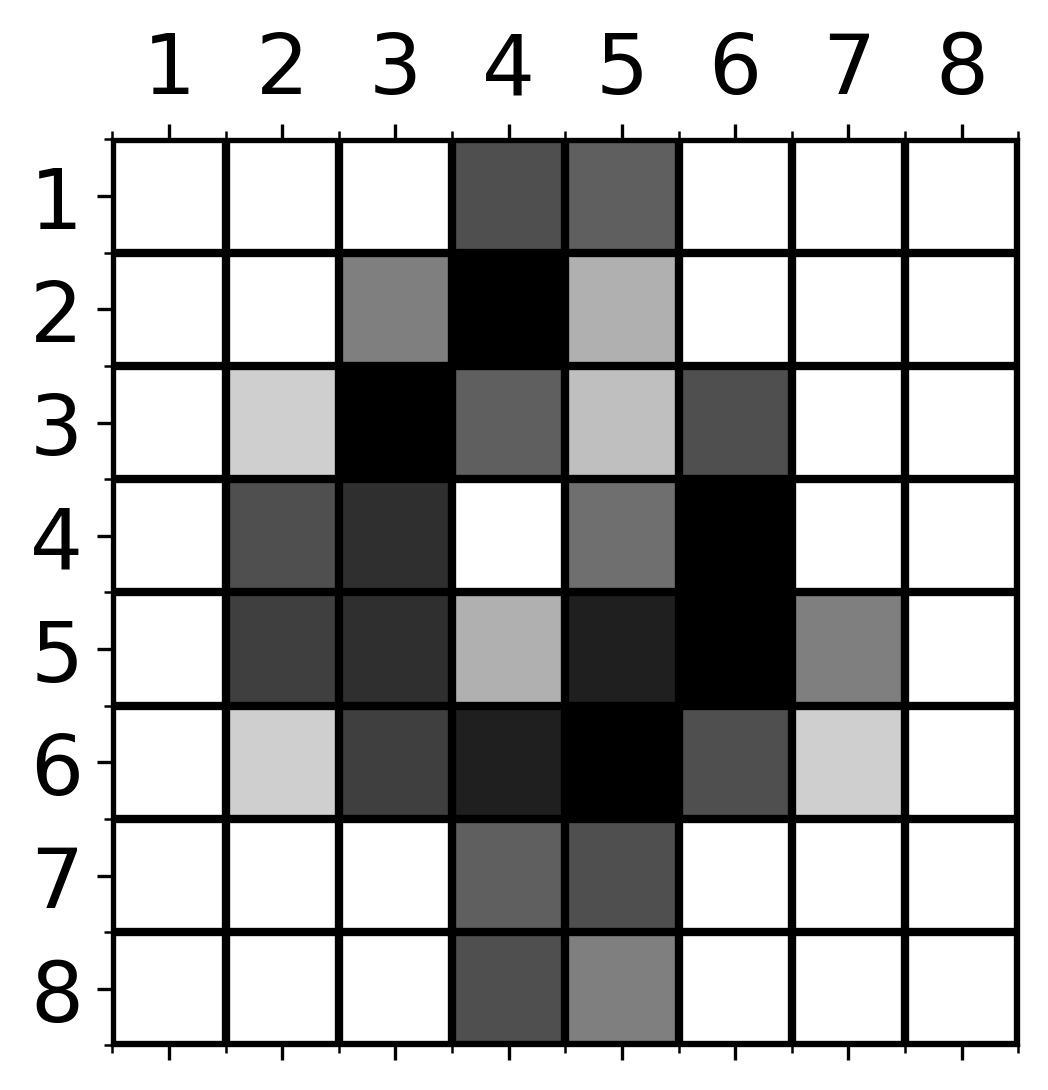
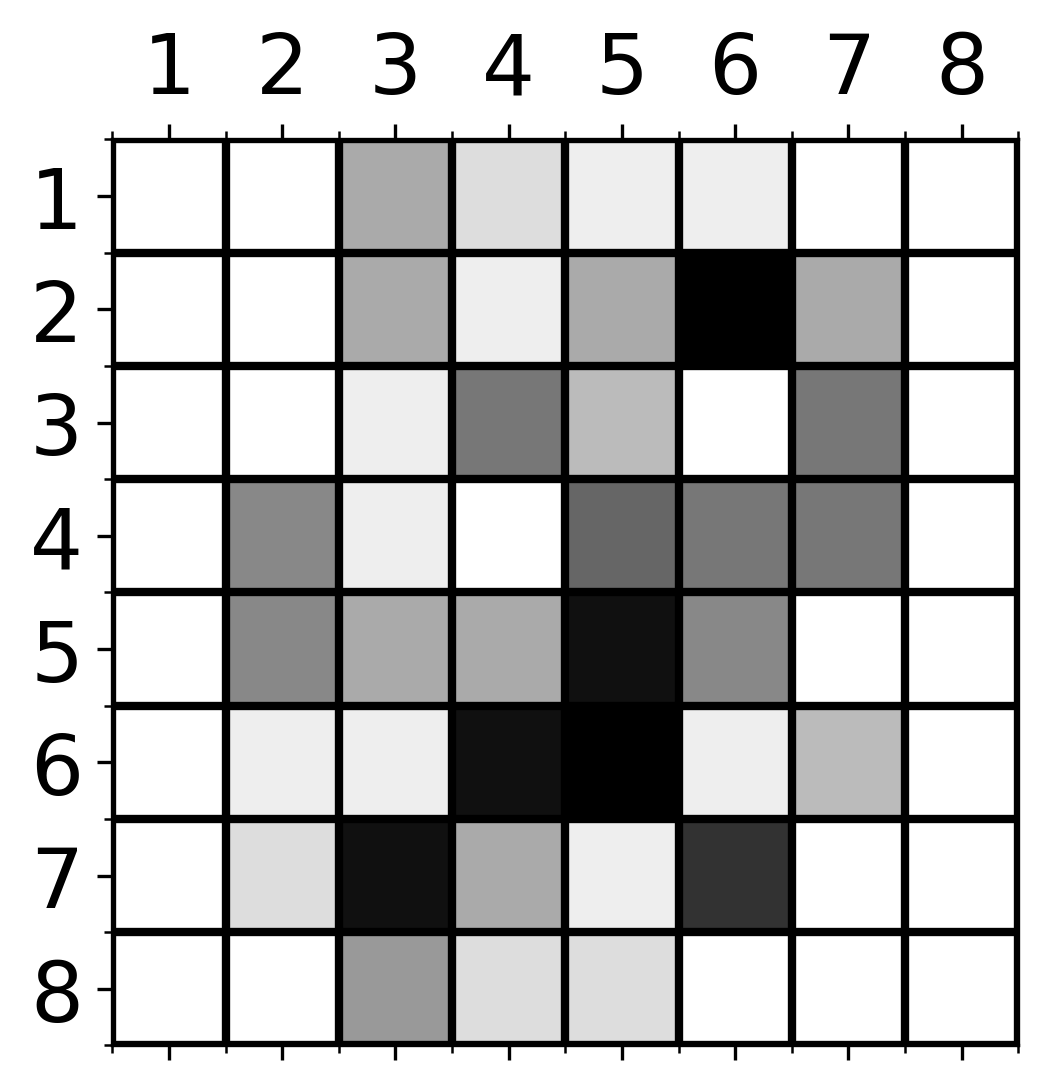

Published succesfully, preview at: https://www.mscthesis.nl/preview?id=62022f89-c7f6-4a52-82b0-c46b7b14a952


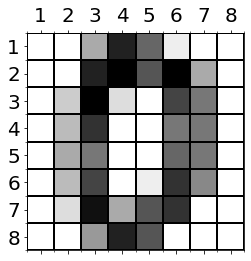

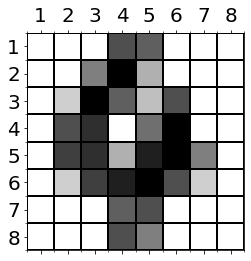

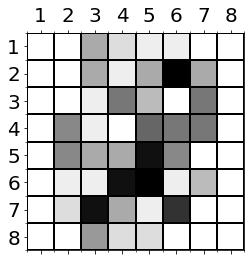

In [23]:
t = r"""
<div style="display: flex; align-items: center; justify-content: center; margin-bottom: 10px;">
    $A = $<img src="zero_1.png" width="150"/>
    $B = $<img src="zero_2.png" width="150"/>
    $D = $<img src="diff.png" width="150"/>
</div>

$A = @z1, B = @z2, D = |A - B| = @d, \sum D = @s$
"""

# TODO: illustrate non-binary case
zero_1 = nums[0]
zero_1 = to_binary(zero_1)

zero_2 = nums[1]
zero_2 = to_binary(zero_2)

save_image_for(zero_1, "zero_1")
save_image_for(zero_2, "zero_2")
save_image_for(np.abs(zero_1 - zero_2), "diff")

z1 = sp.Matrix(zero_1)
z2 = sp.Matrix(zero_2)
params = {}
params["z1"] = z1
params["z2"] = z2

distance_matrix = np.abs(z1 - z2)
d = sp.Matrix(distance_matrix)
params["d"] = d
params["s"] = np.sum(distance_matrix)

e = Exercise(MarkdownBlock(t, params))
e.display()
e.write()
e.publish()